In [1]:
import pandas as pd
import numpy as np
import time
import datetime 
import scipy.stats
import calendar
from matplotlib import pyplot as plt
import seaborn as sns
pd.options.display.max_rows = 53000
%matplotlib inline

In [2]:
data = pd.read_csv('/mnt/c/users/marcj/Desktop/MASTER/TFM/DADES POLLUTION/Notebooks/datasets/datasets/Gracia/notebook-serie-Gra_NOX-19', parse_dates= ['DATA'], index_col='DATA',header=0)

In [3]:
vent_raval = pd.read_csv('/mnt/c/users/marcj/Desktop/MASTER/TFM/DADES POLLUTION/Notebooks/datasets/meteo_19/meteo-vent-raval', parse_dates= ['DATA'], index_col='DATA',header=0)

In [4]:
temp_raval = pd.read_csv('/mnt/c/users/marcj/Desktop/MASTER/TFM/DADES POLLUTION/Notebooks/datasets/meteo_19/meteo-temp-raval', parse_dates= ['DATA'], index_col='DATA',header=0)

In [5]:
hum_raval = pd.read_csv('/mnt/c/users/marcj/Desktop/MASTER/TFM/DADES POLLUTION/Notebooks/datasets/meteo_19/meteo-hum-raval', parse_dates= ['DATA'], index_col='DATA',header=0)

In [6]:
prep_raval = pd.read_csv('/mnt/c/users/marcj/Desktop/MASTER/TFM/DADES POLLUTION/Notebooks/datasets/meteo_19/meteo-prep-raval', parse_dates= ['DATA'], index_col='DATA',header=0)

In [7]:
pre_raval = pd.read_csv('/mnt/c/users/marcj/Desktop/MASTER/TFM/DADES POLLUTION/Notebooks/datasets/meteo_19/meteo-pressio-raval', parse_dates= ['DATA'], index_col='DATA',header=0)

In [8]:
pre_raval = np.log(pre_raval)

In [9]:
trans_8001 = pd.read_csv('/mnt/c/users/marcj/Desktop/MASTER/TFM/DADES POLLUTION/Notebooks/datasets/transit/transit-8001', parse_dates= ['DATA'], index_col='DATA',header=0)

In [10]:
trans_8001 = np.log(trans_8001)

In [11]:
trans_8039 = pd.read_csv('/mnt/c/users/marcj/Desktop/MASTER/TFM/DADES POLLUTION/Notebooks/datasets/transit/transit-8039', parse_dates= ['DATA'], index_col='DATA',header=0)

In [12]:
trans_8039 = np.log(trans_8039)

In [13]:
vent_raval.rename(columns={'VALOR_LECTURA':'VENT_RAVAL'}, inplace=True)

In [14]:
temp_raval.rename(columns={'VALOR_LECTURA':'TEMP_RAVAL'}, inplace=True)

In [15]:
hum_raval.rename(columns={'VALOR_LECTURA':'HUM_RAVAL'}, inplace=True)

In [16]:
prep_raval.rename(columns={'VALOR_LECTURA':'PREP_RAVAL'}, inplace=True)

In [17]:
pre_raval.rename(columns={'VALOR_LECTURA':'PRE_RAVAL'}, inplace=True)

In [18]:
trans_8001.rename(columns={'Valor_IMD':'8001'}, inplace=True)

In [19]:
trans_8039.rename(columns={'Valor_IMD':'8039'}, inplace=True)

In [20]:
final = pd.merge(data, vent_raval, on = 'DATA')

In [21]:
final = pd.merge(final, temp_raval, on = 'DATA')

In [22]:
final = pd.merge(final, temp_raval, on = 'DATA')

In [23]:
final = pd.merge(final, pre_raval, on = 'DATA')

In [24]:
final = pd.merge(final, prep_raval, on = 'DATA')

In [25]:
final = pd.merge(final, trans_8001, on= 'DATA')

In [26]:
final = pd.merge(final, trans_8039, on = 'DATA')

In [27]:
final.head()

,H,VENT_RAVAL,TEMP_RAVAL_x,TEMP_RAVAL_y,PRE_RAVAL,PREP_RAVAL,8001,8039
DATA,,,,,,,,
2017-01-01,110.5,2.6,13.1,13.1,6.931862,0.0,9.519345,9.252154
2017-01-02,373.0,3.0,15.7,15.7,6.921658,0.0,9.519345,9.346182
2017-01-03,122.0,4.0,15.6,15.6,6.923530,0.0,9.519345,9.350972
2017-01-04,91.0,3.2,14.9,14.9,6.920770,3.3,9.519345,8.989320
2017-01-05,78.5,4.0,17.5,17.5,6.924121,0.0,9.519345,8.655040


In [28]:
TEST_SIZE = 310

In [29]:
train, test = final[:-TEST_SIZE], final[-TEST_SIZE:]

In [30]:
train.shape

(785, 8)

In [31]:
train_1 = train.values
test_1 = test.values

In [32]:
train_1.shape

(785, 8)

In [33]:
x = np.arange(8760)
x = np.reshape(x, (1095,8))

In [34]:
x_train = x[:-TEST_SIZE]

In [35]:
x_test = x[-TEST_SIZE:]

In [36]:
prueba = pd.merge(data, vent_raval, on = 'DATA')

In [37]:
prueba = pd.merge(prueba, temp_raval, on = 'DATA')

In [38]:
prueba = pd.merge(prueba, temp_raval, on = 'DATA')

In [39]:
prueba = pd.merge(prueba, pre_raval, on = 'DATA')

In [40]:
prueba = pd.merge(prueba, prep_raval, on = 'DATA')

In [41]:
prueba = pd.merge(prueba, trans_8001, on= 'DATA')

In [42]:
prueba = pd.merge(prueba, trans_8039, on = 'DATA')

# ARIMA / SARIMA

In [43]:
ultimo_fecha = max(data.index)
ultimo_dia_mes = calendar.monthrange(ultimo_fecha.year, ultimo_fecha.month)[1]
inicio = min(data.index).replace(day=1)
fin = ultimo_fecha.replace(day=ultimo_dia_mes)

index =pd.DatetimeIndex(start=inicio, end=fin, freq= '24h')
data = data.reindex(index)

/home/marc/[/Usuarios/marcj/Descargas]/envs/masterds/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  


In [44]:
data.isnull().sum()

H    0
dtype: int64

In [45]:
mean = data['H'].astype(float).mean(skipna=True)

In [46]:
data['H'].replace(to_replace=np.NaN, value= mean, inplace=True)

In [47]:
data.isnull().sum()

H    0
dtype: int64

In [48]:
data.describe()

,H
count,1095.000000
mean,174.416589
std,121.343354
min,20.500000
25%,93.500000
50%,139.500000
75%,215.000000
max,963.000000


/home/marc/[/Usuarios/marcj/Descargas]/envs/masterds/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


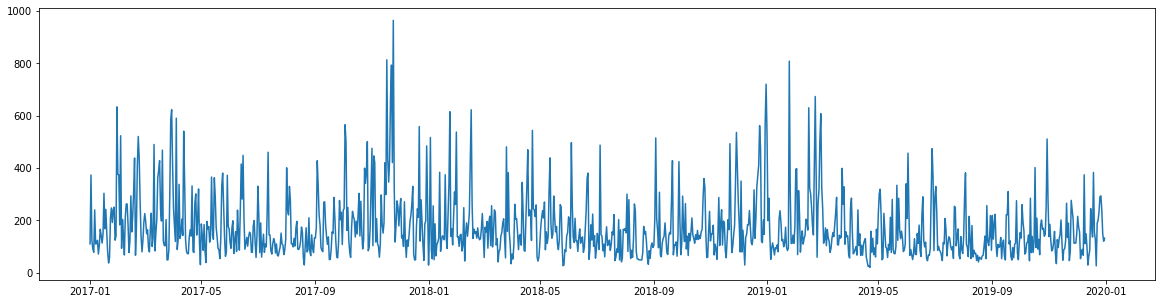

In [49]:
plt.figure(figsize=(20,5))
plt.plot(data)

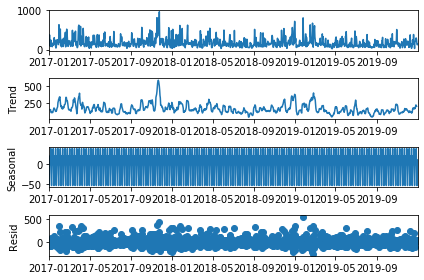

In [50]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(data)
fig= decomposition.plot()

/home/marc/[/Usuarios/marcj/Descargas]/envs/masterds/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning


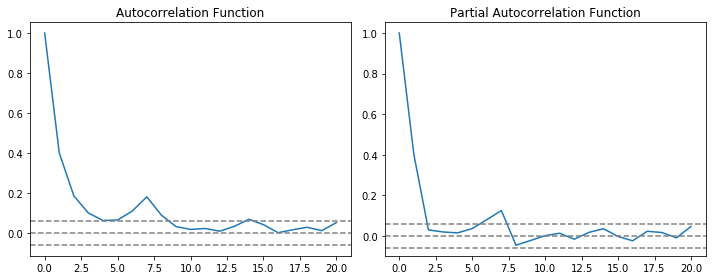

In [51]:
plt.figure(figsize=(10,4))

from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(data, nlags=20)
lag_pacf = pacf(data, nlags= 20, method='ols')

plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle= '--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(data)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(data)), linestyle='--', color='gray')
plt.title('Autocorrelation Function')

plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle= '--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(data)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(data)), linestyle='--', color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In [52]:
from statsmodels.tsa.arima_model import ARIMA

model_conf = ARIMA(data, order= (2,1, 3))
model_fit = model_conf.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.H   No. Observations:                 1094
Model:                 ARIMA(2, 1, 3)   Log Likelihood               -6701.737
Method:                       css-mle   S.D. of innovations            110.599
Date:                Wed, 22 Jul 2020   AIC                          13417.475
Time:                        12:23:48   BIC                          13452.458
Sample:                    01-02-2017   HQIC                         13430.713
                         - 12-31-2019                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0365      0.133     -0.274      0.784      -0.297       0.224
ar.L1.D.H     -0.5166      0.134     -3.842      0.000      -0.780      -0.253
ar.L2.D.H      0.3399      0.079      4.307      0.000       0.185       0.495
ma.L1.D.H     -0.0992      0.137     -0.723      0.469      -0.368       0.170
ma.L2.D.H     -0.8881      0.082    -10.789      0.000      -1.049      -0.727
ma.L3.D.H      0.0323      0.083      0.387      0.699      -0.131       0.196
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.1161           +0.0000j            1.1161            0.5000
AR.2            2.6359           +0.0000j            2.6359            0.0000
MA.1            1.0250           +0.0000j            1.0250            0.0000
MA.2           -1.0957           +0.0000j            1.0957            0.5000
MA.3           27.5840           +0.0000j           27.5840            0.0000
-----------------------------------------------------------------------------
"""

In [53]:
model_conf = ARIMA(data[:'2019-12-31'], order=(2,1,3))
model_fit= model_conf.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.H   No. Observations:                 1094
Model:                 ARIMA(2, 1, 3)   Log Likelihood               -6701.737
Method:                       css-mle   S.D. of innovations            110.599
Date:                Wed, 22 Jul 2020   AIC                          13417.475
Time:                        12:23:49   BIC                          13452.458
Sample:                    01-02-2017   HQIC                         13430.713
                         - 12-31-2019                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0365      0.133     -0.274      0.784      -0.297       0.224
ar.L1.D.H     -0.5166      0.134     -3.842      0.000      -0.780      -0.253
ar.L2.D.H      0.3399      0.079      4.307      0.000       0.185       0.495
ma.L1.D.H     -0.0992      0.137     -0.723      0.469      -0.368       0.170
ma.L2.D.H     -0.8881      0.082    -10.789      0.000      -1.049      -0.727
ma.L3.D.H      0.0323      0.083      0.387      0.699      -0.131       0.196
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.1161           +0.0000j            1.1161            0.5000
AR.2            2.6359           +0.0000j            2.6359            0.0000
MA.1            1.0250           +0.0000j            1.0250            0.0000
MA.2           -1.0957           +0.0000j            1.0957            0.5000
MA.3           27.5840           +0.0000j           27.5840            0.0000
-----------------------------------------------------------------------------
"""

In [54]:
model_conf = ARIMA(data[:'2019-12-31'], order =(2,1,2), freq='D')
model_fit = model_conf.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.H   No. Observations:                 1094
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -6701.812
Method:                       css-mle   S.D. of innovations            110.607
Date:                Wed, 22 Jul 2020   AIC                          13415.623
Time:                        12:23:50   BIC                          13445.609
Sample:                    01-02-2017   HQIC                         13426.970
                         - 12-31-2019                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0353      0.136     -0.260      0.795      -0.302       0.231
ar.L1.D.H     -0.5562      0.085     -6.567      0.000      -0.722      -0.390
ar.L2.D.H      0.3149      0.045      6.940      0.000       0.226       0.404
ma.L1.D.H     -0.0564      0.078     -0.726      0.468      -0.209       0.096
ma.L2.D.H     -0.8950      0.076    -11.765      0.000      -1.044      -0.746
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.1057           +0.0000j            1.1057            0.5000
AR.2            2.8719           +0.0000j            2.8719            0.0000
MA.1            1.0260           +0.0000j            1.0260            0.0000
MA.2           -1.0890           +0.0000j            1.0890            0.5000
-----------------------------------------------------------------------------
"""

In [55]:
residuals = pd.DataFrame(model_fit.resid)

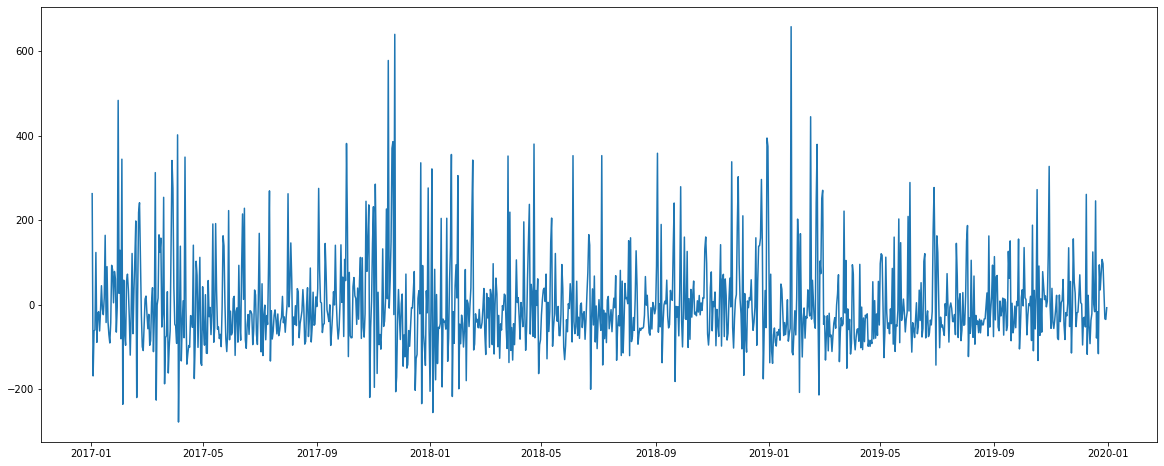

In [56]:
plt.figure(figsize=(20,8))
plt.plot(residuals)

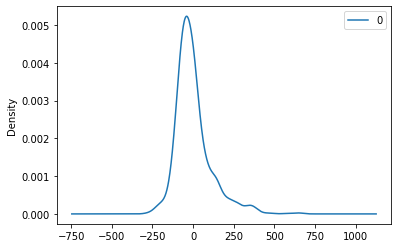

In [57]:
residuals.plot(kind='kde')

In [58]:
ini_forecast = pd.Timestamp('2019-01-01', freq='D')
ndays= 365

end_forecast = ini_forecast + ndays -1

/home/marc/[/Usuarios/marcj/Descargas]/envs/masterds/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  after removing the cwd from sys.path.


In [59]:
model_conf = ARIMA(data[:ini_forecast-1], order=(2,1,2), freq='D')
model_fit = model_conf.fit()
forecast = model_fit.forecast(ndays)[0]
forecast = pd.DataFrame(forecast, columns=['forecast'],
                       index=data[ini_forecast:end_forecast].index)

/home/marc/[/Usuarios/marcj/Descargas]/envs/masterds/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  """Entry point for launching an IPython kernel.


In [60]:
forecast_daily = []
for d in range (ndays):
    ini_test = ini_forecast + d
    modelconf_day =ARIMA(data[:ini_test - 1], order = (2,1,1), freq='D')
    modelfit_day = modelconf_day.fit()
    forecast_daily.append(modelfit_day.forecast(1)[0])
    
forecast_daily = pd.DataFrame(forecast_daily, columns=['forecast'],
                             index=data[ini_forecast:end_forecast].index)

/home/marc/[/Usuarios/marcj/Descargas]/envs/masterds/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  This is separate from the ipykernel package so we can avoid doing imports until
/home/marc/[/Usuarios/marcj/Descargas]/envs/masterds/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  after removing the cwd from sys.path.
/home/marc/[/Usuarios/marcj/Descargas]/envs/masterds/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/marc/[/Usuarios/marcj/Descargas]/envs/m

/home/marc/[/Usuarios/marcj/Descargas]/envs/masterds/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  


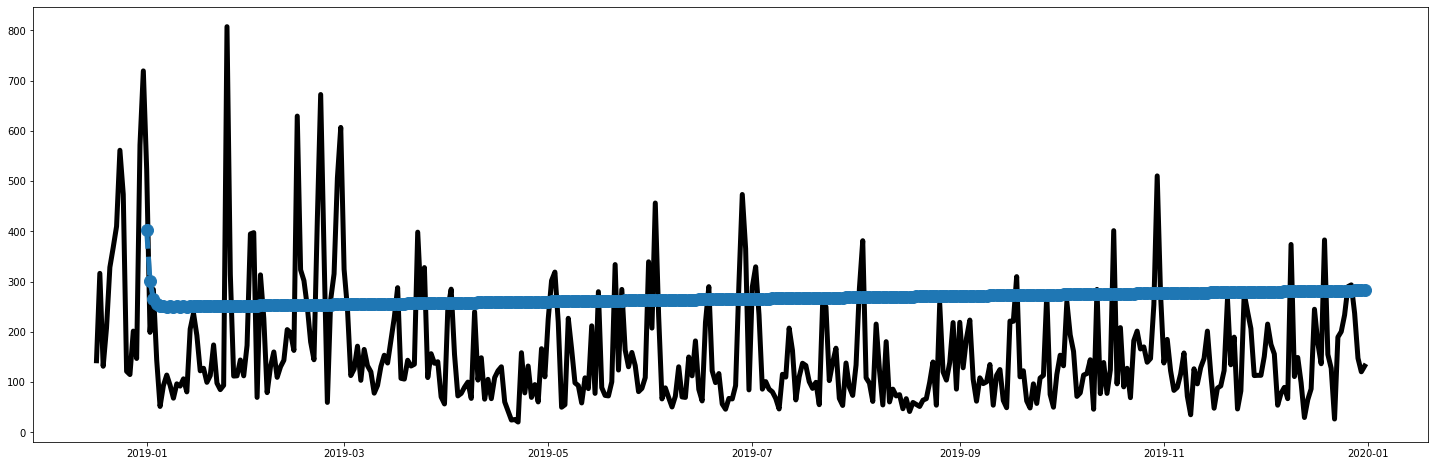

In [61]:
plt.figure(figsize=(25, 8))
plt.plot(data[ini_forecast-15:end_forecast], linewidth=5, color='black')
plt.plot(forecast, linewidth=5, linestyle='--', markersize=12, marker='o')

/home/marc/[/Usuarios/marcj/Descargas]/envs/masterds/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  


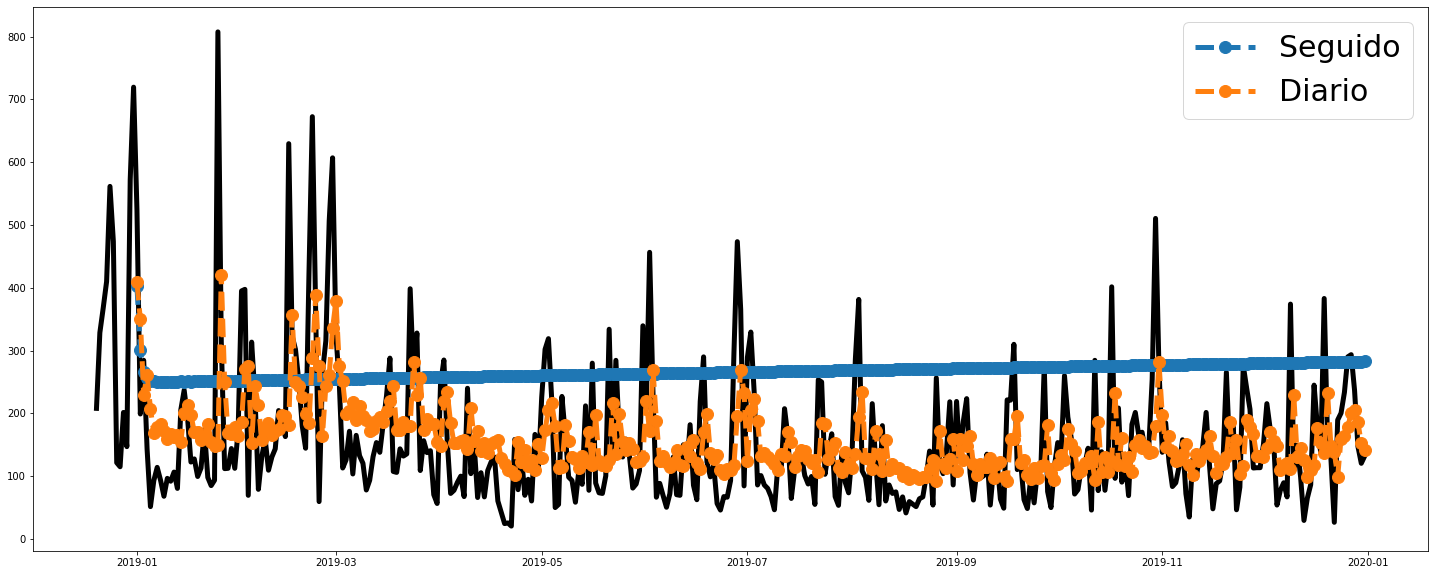

In [62]:
plt.figure(figsize=(25, 10))
plt.plot(data[ini_forecast-12:end_forecast], linewidth=5, color='black')
plt.plot(forecast, linewidth=5, linestyle='--', markersize=12, marker='o', label='Seguido')
plt.plot(forecast_daily, linewidth=5, linestyle='--', markersize= 12, marker='o', label='Diario')
plt.legend(prop={'size':30})

# REGRESIÓN LINEAL

In [63]:
data.shape

(1095, 1)

In [64]:
train_data, test_data = data.iloc[:-TEST_SIZE], data.iloc[-TEST_SIZE:]

In [65]:
x_train_data = np.array(range(train_data.shape[0]))
x_test_data = np.array(range(train_data.shape[0], data.shape[0]))

In [66]:
x_test_data.shape

(310,)

In [67]:
x_train_data.shape

(785,)

In [68]:
train_data.shape

(785, 1)

In [69]:
test_data.shape

(310, 1)

In [70]:
from sklearn.linear_model import LinearRegression

In [71]:
y_pred_mean = [train_data.values[-12:].mean()] * 310

In [72]:
train_data = train_data.values

In [73]:
lr_model = LinearRegression()
lr_model.fit(x_train_data.reshape(-1,1), train_data)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [74]:
y_pred_lr = lr_model.predict(x_test_data.reshape(-1,1))

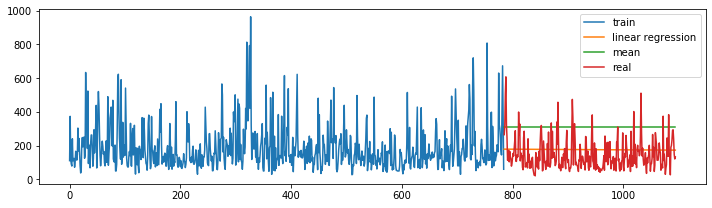

In [75]:
fig, ax = plt.subplots(1, 1, figsize=(10,3))
ax.plot(x_train_data, train_data, label='train')
ax.plot(x_test_data, y_pred_lr, label ='linear regression')
ax.plot(x_test_data, y_pred_mean, label='mean')
ax.plot(x_test_data, test_data, label ='real')
plt.legend()
plt.tight_layout()

In [76]:
def mae(y_true, y_pred):
    return np.abs(y_true - y_pred).sum() / y_true.size

In [77]:
print('MAE in a mean model:', mae (test_data.values, y_pred_mean))

MAE in a mean model: 53938.33333333332


In [78]:
print('MAE in linear regression model:', mae(test_data.values, y_pred_lr))

MAE in linear regression model: 81.75012566649497


In [79]:
def mse(y_true, y_pred):
    return((y_true - y_pred)** 2).sum() / y_true.size

In [80]:
print('MSE in mean model:', mse(test_data.values, y_pred_mean))
print('MSE in linear regression model:', mse(test_data.values, y_pred_lr))

MSE in mean model: 10958747.111111114
MSE in linear regression model: 9486.192702397839


In [81]:
def rmse(y_true, y_pred):
    return np.sqrt(((y_true - y_pred)** 2).sum() / y_true.size)

In [82]:
print('RMSE in mean model:', rmse(test_data.values, y_pred_mean))
print('RMSE in linear regression model:', rmse(test_data.values, y_pred_lr))

RMSE in mean model: 3310.399841576711
RMSE in linear regression model: 97.39708775111214


In [83]:
def mape (y_true, y_pred):
    return 2 * np.abs((y_true - y_pred) / y_true).sum() / y_true.size

In [84]:
print('MAPE in mean model:', mape(test_data.values, y_pred_mean))
print('MAPE in linear regression model:', mape(test_data.values, y_pred_lr))

MAPE in mean model: 1271.4830140981692
MAPE in linear regression model: 1.7727086259107117


In [85]:
lrw_model = LinearRegression()
lrw_model.fit(x_train_data.reshape(-1,1), train_data,
             sample_weight= [i**5 for i in x_train_data])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [86]:
y_pred_lr_w = lrw_model.predict(x_test_data.reshape(-1, 1))

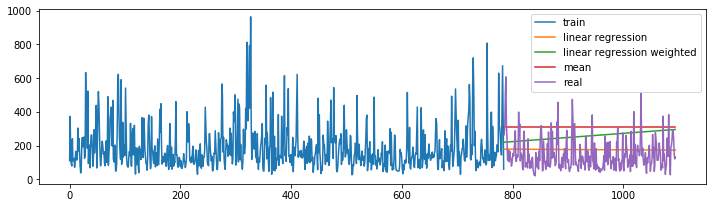

In [87]:
fig, ax = plt.subplots(1, 1, figsize=(10, 3))
ax.plot(x_train_data, train_data, label='train')
ax.plot(x_test_data, y_pred_lr, label='linear regression')
ax.plot(x_test_data, y_pred_lr_w, label='linear regression weighted')
ax.plot(x_test_data, y_pred_mean, label='mean')
ax.plot(x_test_data, test_data, label='real')
plt.legend()
plt.tight_layout()

In [88]:
print('MAE in mean model: ', mae(test_data.values, y_pred_mean))
print('MAE in linear regression model: ', mae(test_data.values, y_pred_lr))
print('MAE in weighted linear regression model: ', mae(test_data.values, y_pred_lr_w))

print('RMSE in mean model: ', rmse(test_data.values, y_pred_mean))
print('RMSE in linear regression model: ', rmse(test_data.values, y_pred_lr))
print('RMSE in weighted linear regression model: ', rmse(test_data.values, y_pred_lr_w))

MAE in mean model:  53938.33333333332
MAE in linear regression model:  81.75012566649497
MAE in weighted linear regression model:  133.91094287142514
RMSE in mean model:  3310.399841576711
RMSE in linear regression model:  97.39708775111214
RMSE in weighted linear regression model:  147.89107427295588


In [89]:
model = LinearRegression()
model.fit(x_train.reshape(-1, 1), train_1.reshape(-1,1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

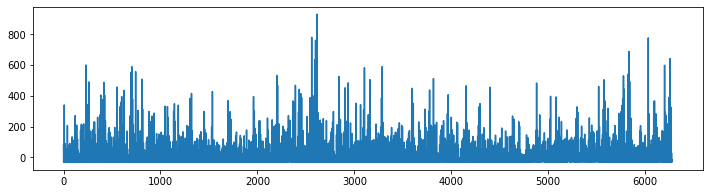

In [90]:
train_log_trend = (train_1.reshape(-1,1) - model.predict(x_train.reshape(-1, 1))).squeeze()

fig, ax = plt.subplots(1, 1, figsize=(12, 3))
ax.plot(x_train.reshape(-1,1), train_log_trend.reshape(-1,1))

In [91]:
type(train_log_trend)

numpy.ndarray

In [92]:
train_log_trend = pd.DataFrame(train_log_trend)

In [93]:
train_log_trend.replace(to_replace= -np.inf, value= 0.479792, inplace= True)

In [94]:
train_log_trend.head()

,0
0,77.294207
1,-30.605492
2,-20.105190
3,-20.104889
4,-26.272725


# REGRESIÓN POLINOMICA

In [95]:
prueba.shape

(1095, 8)

In [96]:
TEST_SIZE = 310

In [97]:
x_prueba = np.arange(8760)
x_prueba = np.reshape(x_prueba, (1095,8))

In [98]:
x_train_prueba =  x_prueba[:-TEST_SIZE]

In [99]:
x_test_prueba = x_prueba[-TEST_SIZE:]

In [100]:
prueba_train, prueba_test = prueba[:-TEST_SIZE], prueba[-TEST_SIZE:]

In [101]:
prueba_train_1 = prueba_train.values

In [102]:
prueba_test_1 = prueba_test.values

In [103]:
prueba = prueba.reset_index()

In [104]:
prueba.head()

,DATA,H,VENT_RAVAL,TEMP_RAVAL_x,TEMP_RAVAL_y,PRE_RAVAL,PREP_RAVAL,8001,8039
0,2017-01-01,110.5,2.6,13.1,13.1,6.931862,0.0,9.519345,9.252154
1,2017-01-02,373.0,3.0,15.7,15.7,6.921658,0.0,9.519345,9.346182
2,2017-01-03,122.0,4.0,15.6,15.6,6.923530,0.0,9.519345,9.350972
3,2017-01-04,91.0,3.2,14.9,14.9,6.920770,3.3,9.519345,8.989320
4,2017-01-05,78.5,4.0,17.5,17.5,6.924121,0.0,9.519345,8.655040


In [105]:
prueba.dtypes

DATA            datetime64[ns]
H                      float64
VENT_RAVAL             float64
TEMP_RAVAL_x           float64
TEMP_RAVAL_y           float64
PRE_RAVAL              float64
PREP_RAVAL             float64
8001                   float64
8039                   float64
dtype: object

In [106]:
prueba.shape

(1095, 9)

In [107]:
prueba['DATA'] = prueba['DATA'].astype(int)

In [108]:
prueba['DATA'] = np.arange(1095)

In [109]:
prueba.head()

,DATA,H,VENT_RAVAL,TEMP_RAVAL_x,TEMP_RAVAL_y,PRE_RAVAL,PREP_RAVAL,8001,8039
0,0,110.5,2.6,13.1,13.1,6.931862,0.0,9.519345,9.252154
1,1,373.0,3.0,15.7,15.7,6.921658,0.0,9.519345,9.346182
2,2,122.0,4.0,15.6,15.6,6.923530,0.0,9.519345,9.350972
3,3,91.0,3.2,14.9,14.9,6.920770,3.3,9.519345,8.989320
4,4,78.5,4.0,17.5,17.5,6.924121,0.0,9.519345,8.655040


In [110]:
prueba.set_index('DATA', inplace = True)

In [111]:
prueba.dtypes

H               float64
VENT_RAVAL      float64
TEMP_RAVAL_x    float64
TEMP_RAVAL_y    float64
PRE_RAVAL       float64
PREP_RAVAL      float64
8001            float64
8039            float64
dtype: object

In [112]:
prueba.head()

,H,VENT_RAVAL,TEMP_RAVAL_x,TEMP_RAVAL_y,PRE_RAVAL,PREP_RAVAL,8001,8039
DATA,,,,,,,,
0,110.5,2.6,13.1,13.1,6.931862,0.0,9.519345,9.252154
1,373.0,3.0,15.7,15.7,6.921658,0.0,9.519345,9.346182
2,122.0,4.0,15.6,15.6,6.923530,0.0,9.519345,9.350972
3,91.0,3.2,14.9,14.9,6.920770,3.3,9.519345,8.989320
4,78.5,4.0,17.5,17.5,6.924121,0.0,9.519345,8.655040


In [113]:
from sklearn.preprocessing import PolynomialFeatures

In [114]:
poli_reg = PolynomialFeatures(degree = 3)

In [115]:
x_train_poli = poli_reg.fit_transform(x_train_prueba)

In [116]:
x_test_poli = poli_reg.fit_transform(x_test_prueba)

In [117]:
pr = LinearRegression()

In [118]:
pr.fit(x_train_poli, prueba_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [119]:
y_pred_pr = pr.predict(x_test_poli)

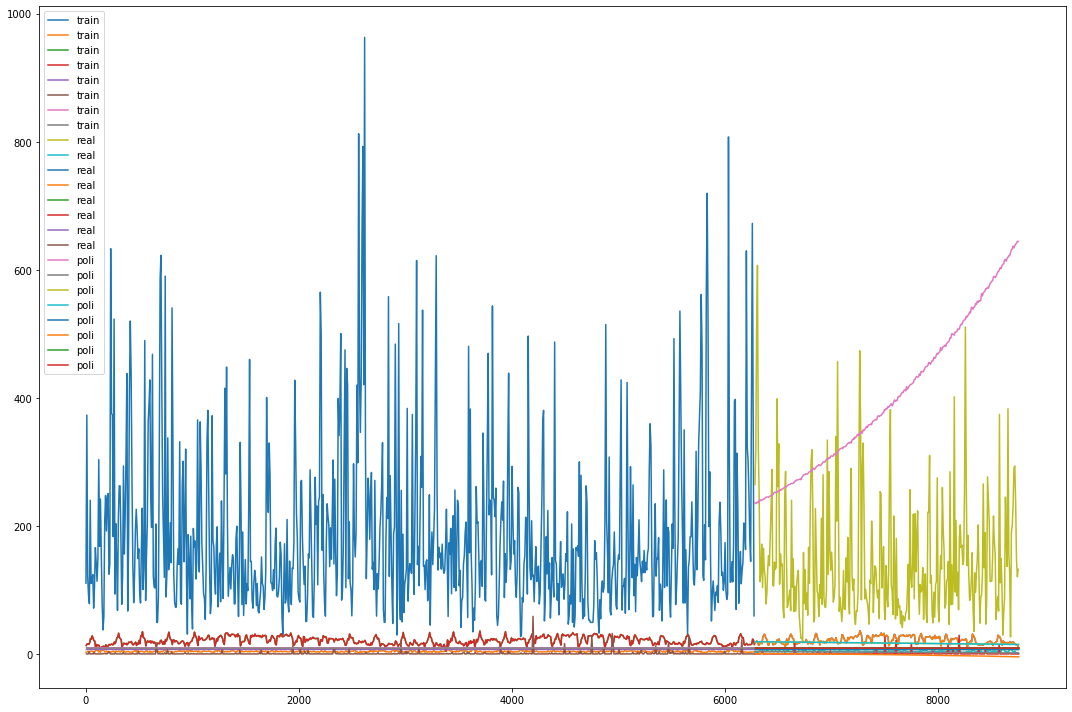

In [120]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
ax.plot(x_train_prueba, prueba_train_1, label='train')
ax.plot(x_test_prueba, prueba_test_1, label='real')
ax.plot(x_test_prueba, y_pred_pr, label='poli')
plt.legend()
plt.tight_layout()

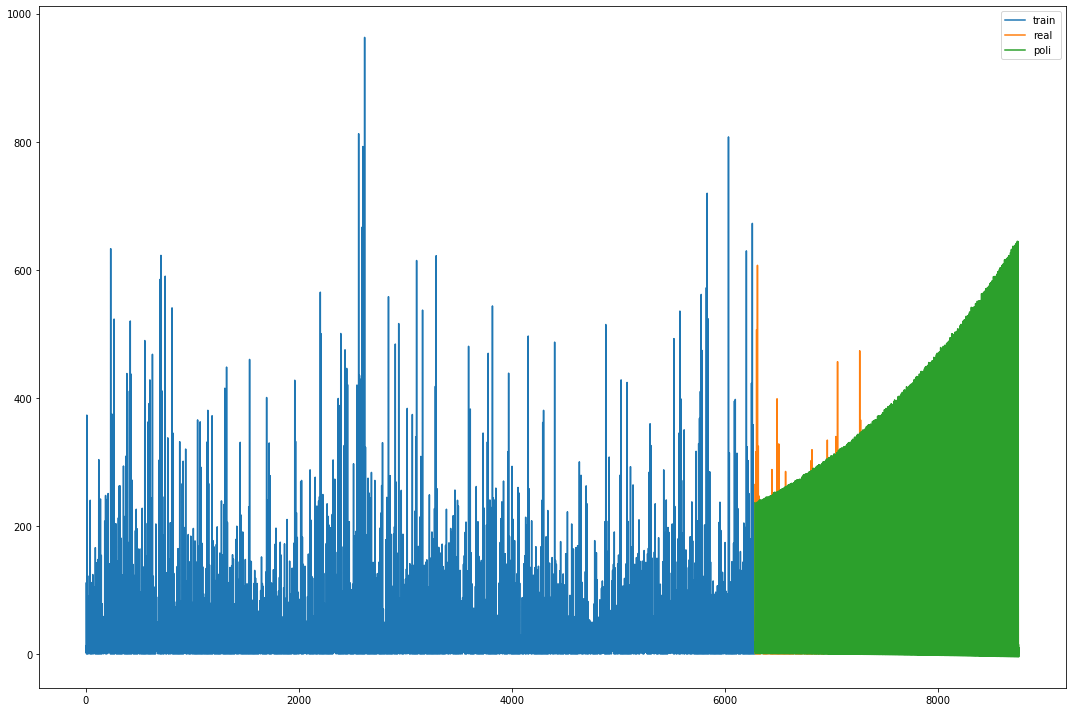

In [121]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
ax.plot(x_train_prueba.reshape(-1,1), prueba_train_1.reshape(-1,1), label='train')
ax.plot(x_test_prueba.reshape(-1,1), prueba_test_1.reshape(-1,1), label='real')
ax.plot(x_test_prueba.reshape(-1,1), y_pred_pr.reshape(-1,1), label='poli')
plt.legend()
plt.tight_layout()

# ARBRES

In [122]:
from sklearn.tree import DecisionTreeRegressor

In [123]:
tree_model = DecisionTreeRegressor()

In [124]:
tree_model.fit(x_train.reshape(-1,1), train_1.reshape(-1,1))

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [125]:
y_pred_tree = tree_model.predict(x_test.reshape(-1,1))

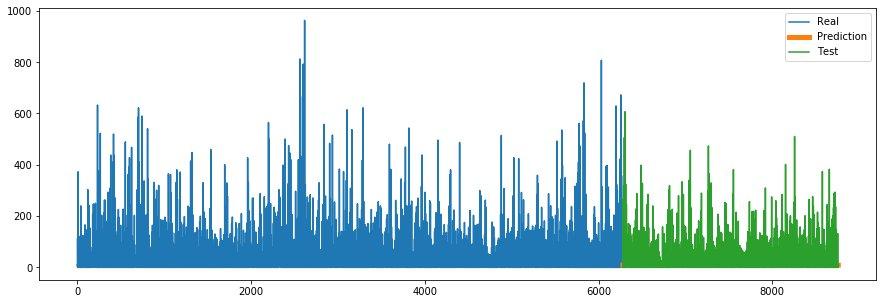

In [126]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(x_train.reshape(-1,1), train_1.reshape(-1,1), label='Real')
ax.plot(x_test.reshape(-1,1), y_pred_tree, label='Prediction', linewidth =5)
ax.plot(x_test.reshape(-1,1), test_1.reshape(-1,1), label = 'Test')
ax.legend()

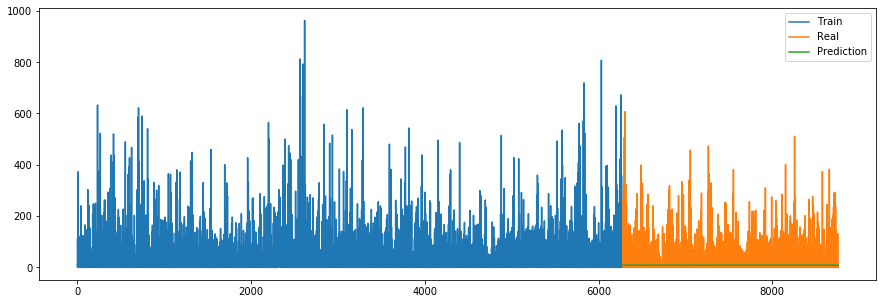

In [127]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(x_train.reshape(-1,1), train_1.reshape(-1,1), label='Train')
ax.plot(x_test.reshape(-1,1), test_1.reshape(-1,1), label='Real')
ax.plot(x_test.reshape(-1,1), y_pred_tree, label='Prediction')
ax.legend()

In [128]:
tree_model = DecisionTreeRegressor(max_depth=7)

In [129]:
tree_model.fit(x_train.reshape(-1,1), train_1.reshape(-1,1))

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=7,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [130]:
y_pred_tree = tree_model.predict(x_train.reshape(-1,1))

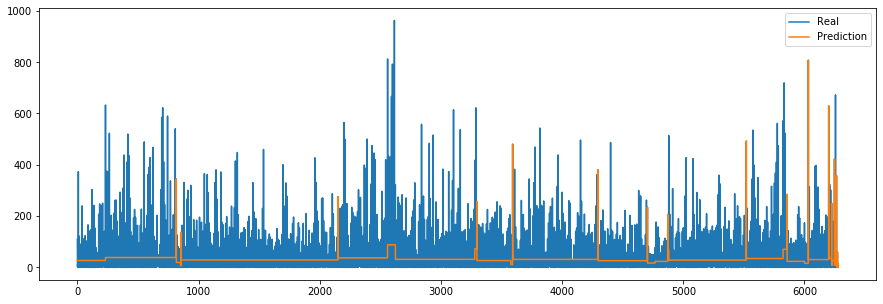

In [131]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(x_train.reshape(-1,1), train_1.reshape(-1,1), label='Real')
ax.plot(x_train.reshape(-1,1), y_pred_tree, label='Prediction')
ax.legend()

# RANDOM FOREST

In [132]:
from sklearn import ensemble

In [133]:
rf_model = ensemble.RandomForestRegressor(n_estimators=100, max_depth=20)
rf_model.fit(x_train.reshape(-1,1), train_1.reshape(-1,1))
y_pred_rf = rf_model.predict(x_test.reshape(-1,1))

/home/marc/[/Usuarios/marcj/Descargas]/envs/masterds/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


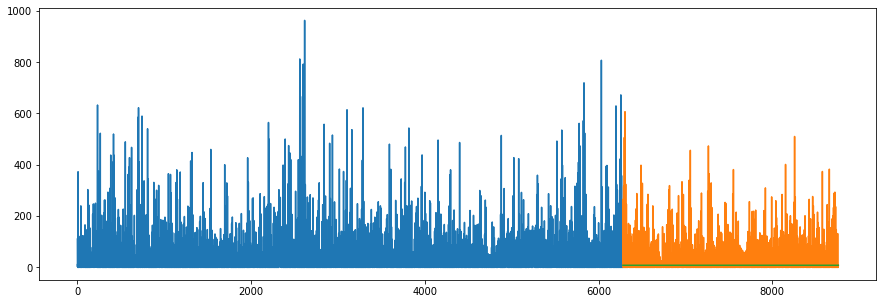

In [134]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(x_train.reshape(-1,1), train_1.reshape(-1,1))
ax.plot(x_test.reshape(-1,1), test_1.reshape(-1,1), label='Real')
ax.plot(x_test.reshape(-1,1), y_pred_rf, label='Prediction')

In [135]:
x_train.reshape(-1,1).shape

(6280, 1)

In [136]:
x_test.reshape(-1,1).shape

(2480, 1)

In [137]:
x_train_month = np.hstack((x_train.reshape(-1,1), np.array(list(range(157)) * 40).reshape(-1,1)))
x_test_month = np.hstack((x_test.reshape(-1,1), np.array(list(range(155)) * 16).reshape(-1,1)))

/home/marc/[/Usuarios/marcj/Descargas]/envs/masterds/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


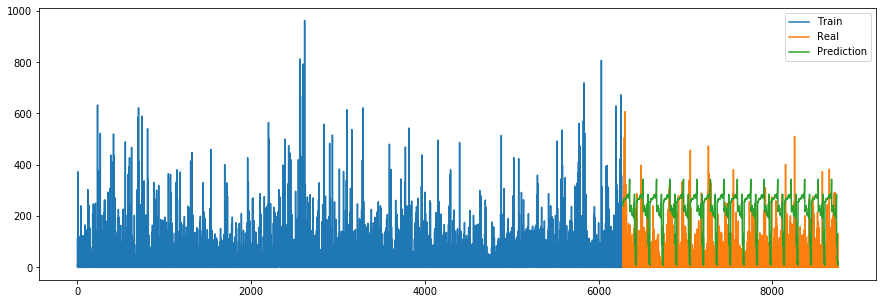

In [138]:
rf_model = ensemble.RandomForestRegressor(n_estimators=100, max_depth=20)
rf_model.fit(x_train_month, train_1.reshape(-1,1))
y_pred_rf = rf_model.predict(x_test_month)

fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(x_train.reshape(-1,1), train_1.reshape(-1,1), label='Train')
ax.plot(x_test.reshape(-1,1), test_1.reshape(-1,1), label='Real')
ax.plot(x_test.reshape(-1,1), y_pred_rf, label='Prediction')
ax.legend()

In [139]:
x_train_month_year = np.hstack((x_train_month, np.repeat(list(range(157)), 40).reshape(-1,1)))
x_test_month_year = np.hstack((x_test_month, np.repeat(list(range(1,156)), 16).reshape(-1,1)))

/home/marc/[/Usuarios/marcj/Descargas]/envs/masterds/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


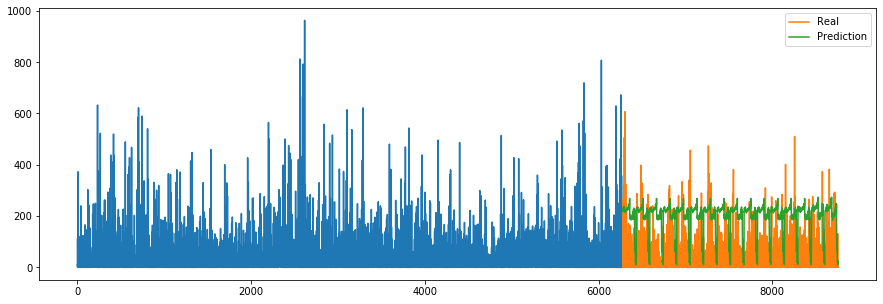

In [140]:
rf_model = ensemble.RandomForestRegressor(n_estimators=100, max_depth=20)
rf_model.fit(x_train_month_year, train_1.reshape(-1,1))
y_pred_rf = rf_model.predict(x_test_month_year)

fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(x_train.reshape(-1,1), train_1.reshape(-1,1))
ax.plot(x_test.reshape(-1,1), test_1.reshape(-1,1), label='Real')
ax.plot(x_test.reshape(-1,1), y_pred_rf, label='Prediction')
ax.legend()

# XGBOOST

In [141]:
from xgboost import XGBRegressor, plot_tree, plot_importance

In [142]:
xgb_model = XGBRegressor(n_estimators=100, max_depth=4)
xgb_model.fit(x_train_month_year, train_1.reshape(-1,1))
y_pred_xgb = xgb_model.predict(x_test_month_year)

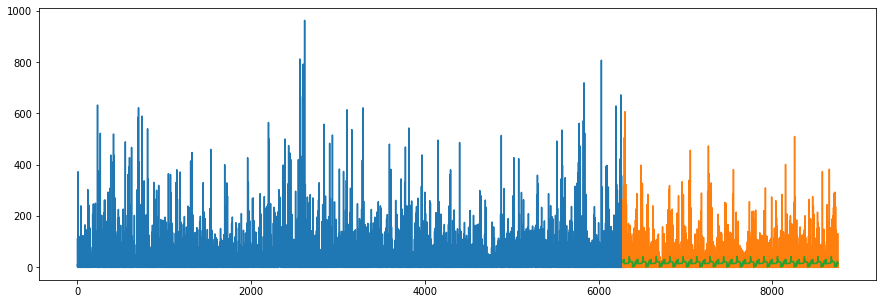

In [143]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(x_train.reshape(-1,1), train_1.reshape(-1,1))
ax.plot(x_test.reshape(-1,1), test_1.reshape(-1,1), label='Real')
ax.plot(x_test.reshape(-1,1), y_pred_xgb, label='Prediction')

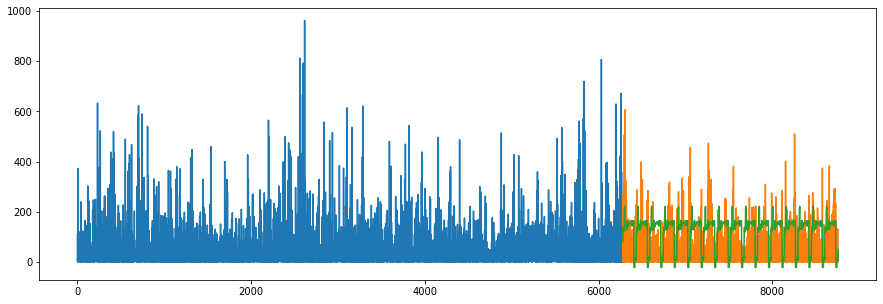

In [144]:
xgb_model = XGBRegressor(n_estimators=100, max_depth=3, learning_rate=1)
xgb_model.fit(x_train_month_year, train_1.reshape(-1,1))
y_pred_xgb = xgb_model.predict(x_test_month_year)



fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(x_train.reshape(-1,1), train_1.reshape(-1,1))
ax.plot(x_test.reshape(-1,1), test_1.reshape(-1,1), label='Real')
ax.plot(x_test.reshape(-1,1), y_pred_xgb, label='Prediction')

In [145]:
x_train_month_year_2ylag = np.hstack(((train_1.reshape(-1,1)[24:] / train_1.reshape(-1,1)[:-24])[:-24],
                                      (train_1.reshape(-1,1)[24:] - train_1.reshape(-1,1)[:-24])[:-24],
                                      x_train_month_year[48:,:]))

/home/marc/[/Usuarios/marcj/Descargas]/envs/masterds/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.
/home/marc/[/Usuarios/marcj/Descargas]/envs/masterds/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


In [146]:
x_test_month_year_2ylag = np.hstack(((train_1[100:].reshape(-1,1) / train_1[:-100].reshape(-1,1))[:2480],
                                     (train_1[100:].reshape(-1,1) - train_1[:-100].reshape(-1,1))[:2480],
                                     x_test_month_year))

/home/marc/[/Usuarios/marcj/Descargas]/envs/masterds/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.
/home/marc/[/Usuarios/marcj/Descargas]/envs/masterds/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


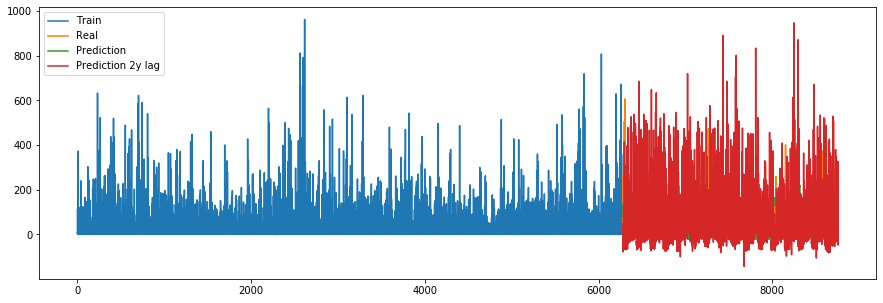

In [147]:
xgb_model = XGBRegressor(n_estimators=300, max_depth=3, learning_rate= 1.2)
xgb_model.fit(x_train_month_year_2ylag, train_1.reshape(-1,1)[48:])
y_pred_xgb_2ylag = xgb_model.predict(x_test_month_year_2ylag)

fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(x_train.reshape(-1,1), train_1.reshape(-1,1), label='Train')
ax.plot(x_test.reshape(-1,1), test_1.reshape(-1,1), label='Real')
ax.plot(x_test.reshape(-1,1), y_pred_xgb, label='Prediction')
ax.plot(x_test.reshape(-1,1), y_pred_xgb_2ylag, label='Prediction 2y lag')
ax.legend()

In [148]:
print(xgb_model.score(x_train_month_year_2ylag, train_1.reshape(-1,1)[48:]))

0.9950414597014521


<Figure size 432x288 with 0 Axes>

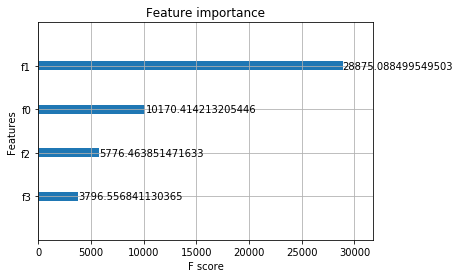

In [149]:
plt.figure()
plot_importance(xgb_model, importance_type='gain')

In [150]:
train_log_trend = train_log_trend.values

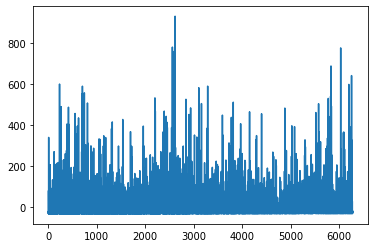

In [151]:
fig, ax = plt.subplots(1, 1)
ax.plot(x_train.reshape(-1,1), train_log_trend.reshape(-1,1))

In [152]:
xgb_model = XGBRegressor(n_estimators=500, max_depth=3, learning_rate=1.2)
xgb_model.fit(x_train_month_year_2ylag, train_log_trend.reshape(-1,1)[48:])
y_pred_xgb_2ylag_wotrend = xgb_model.predict(x_test_month_year_2ylag)

In [153]:
xgb_model.score(x_train_month_year_2ylag, train_log_trend.reshape(-1,1)[48:])

0.9983247257811443

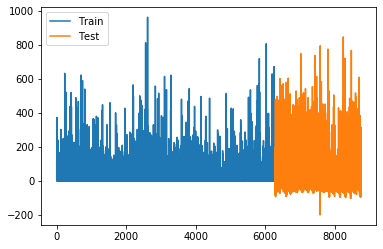

In [154]:
fig, ax = plt.subplots(1, 1)
ax.plot(x_train.reshape(-1,1), train_1.reshape(-1,1), label ='Train')
ax.plot(x_test.reshape(-1,1), y_pred_xgb_2ylag_wotrend, label ='Test')
ax.legend()

In [155]:
y_pred_xgb_2ylag_desc = (y_pred_xgb_2ylag_wotrend + model.predict(x_test.reshape(-1, 1)).squeeze())

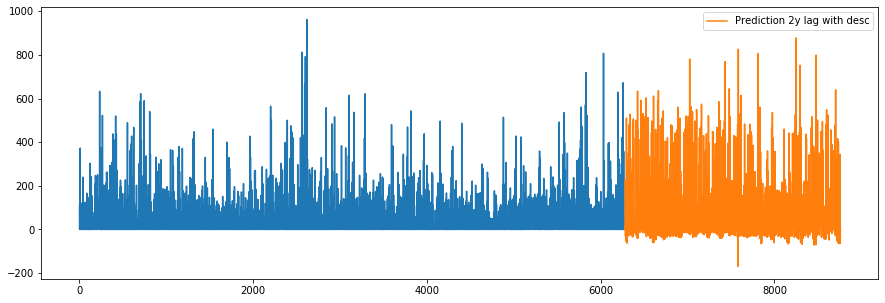

In [156]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(x_train.reshape(-1,1), train_1.reshape(-1,1))
#ax.plot(x_test.reshape(-1,1), test_1.reshape(-1,1), label='Real')

#ax.plot(x_test.reshape(-1,1), y_pred_xgb, label='Prediction seasonality')
#ax.plot(x_test.reshape(-1,1), y_pred_xgb_2ylag_wotrend, label='wotrend')
#ax.plot(x_test.reshape(-1,1), y_pred_xgb_2ylag, label='Prediction 2y lag')
ax.plot(x_test.reshape(-1,1), y_pred_xgb_2ylag_desc, label='Prediction 2y lag with desc')
ax.legend()

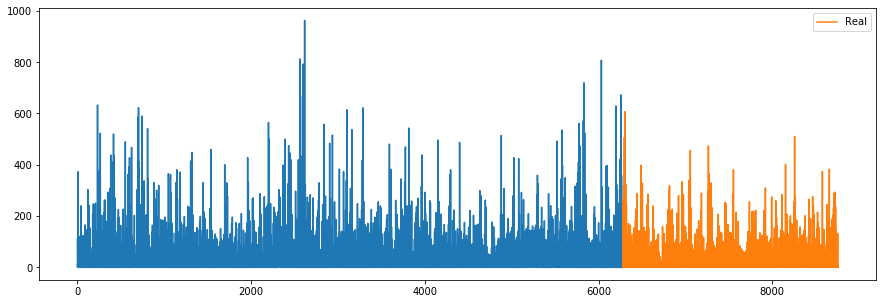

In [157]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(x_train.reshape(-1,1), train_1.reshape(-1,1))
ax.plot(x_test.reshape(-1,1), test_1.reshape(-1,1), label='Real')
ax.legend()

In [158]:
xgb_model.score(x_test_month_year_2ylag, y_pred_xgb_2ylag_desc)

0.9353763473422015